In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


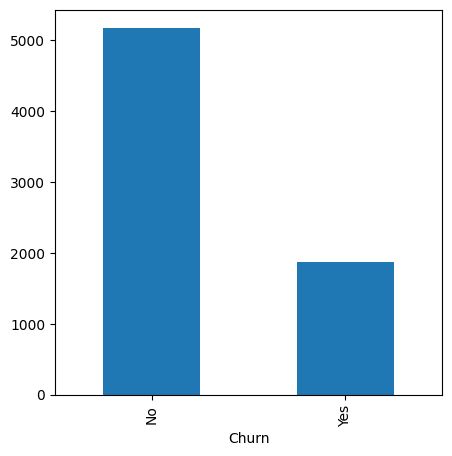

In [9]:
df["Churn"].value_counts().plot(kind='bar',figsize=(5,5)) #shows that the dataset is imbalanced
plt.show()

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
categorical_cols = df.select_dtypes(include = 'object').columns.tolist()
categorical_cols.remove("customerID")
categorical_cols.remove("TotalCharges")

print(categorical_cols)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [13]:
#one hot encoding
for col in categorical_cols:
    print(col, df[col].nunique())
binary_cols = []
multi_cat_cols = []
for col in categorical_cols:
    if df[col].nunique()>2:
        multi_cat_cols.append(col)
    else:
        binary_cols.append(col)


gender 2
Partner 2
Dependents 2
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
Churn 2


In [14]:
for col in binary_cols:
    print(col,df[col].nunique())

gender 2
Partner 2
Dependents 2
PhoneService 2
PaperlessBilling 2
Churn 2


In [15]:
for col in multi_cat_cols:
    print(col,df[col].nunique())

MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaymentMethod 4


In [16]:
for col in binary_cols:
    df[col] = df[col].map({
        'Yes':1,
        'No':0,
        'Male':1,
        'Female':0
    })

In [17]:
df = pd.get_dummies(df,columns=multi_cat_cols, drop_first=True)

In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   gender                                 7043 non-null   int64  
 2   SeniorCitizen                          7043 non-null   int64  
 3   Partner                                7043 non-null   int64  
 4   Dependents                             7043 non-null   int64  
 5   tenure                                 7043 non-null   int64  
 6   PhoneService                           7043 non-null   int64  
 7   PaperlessBilling                       7043 non-null   int64  
 8   MonthlyCharges                         7043 non-null   float64
 9   TotalCharges                           7043 non-null   object 
 10  Churn                                  7043 non-null   int64  
 11  Mult

In [20]:
df.drop(columns = ['customerID'],inplace=True)

In [21]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df['TotalCharges'].fillna(0,inplace= True)

C:\Users\Harshit Sharma\AppData\Local\Temp\ipykernel_3528\3880667669.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0,inplace= True)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop("Churn", axis=1)
y = df["Churn"]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 42,
                                                stratify = y)


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
model = LogisticRegression(max_iter= 1000)
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]



In [38]:
from sklearn.metrics import accuracy_score, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

Accuracy: 0.8069552874378992
ROC-AUC: 0.841778397788628


In [39]:
#improve the logictic model
model_bal  = LogisticRegression(max_iter=1000, class_weight='balanced')
model_bal.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [42]:
y_pred_bal = model_bal.predict(X_test_scaled)
y_pred_proba_bal = model_bal.predict_proba(X_test_scaled)[:,1]

print("Accuracy:",accuracy_score(y_test,y_pred_bal))
print("ROC_AUC:",roc_auc_score(y_test, y_pred_proba_bal))

Accuracy: 0.7402413058907026
ROC_AUC: 0.8414012245214291


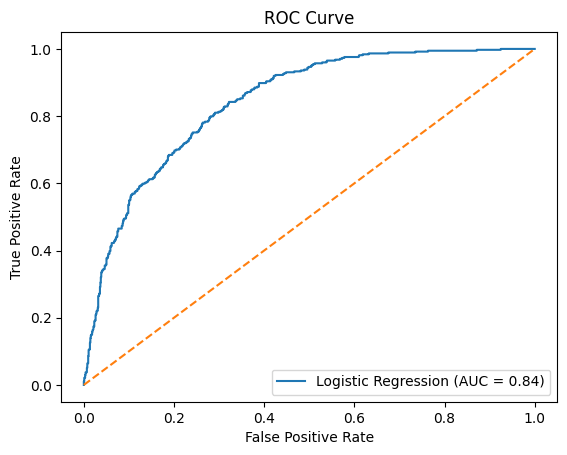

In [43]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, threshholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (AUC = 0.84)')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [45]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 200,max_depth=None, random_state=42,
                        class_weight='balanced')


In [49]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [50]:
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [51]:
from sklearn.metrics import accuracy_score, roc_auc_score

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_pred_proba_rf))

Random Forest Accuracy: 0.7877927608232789
Random Forest ROC-AUC: 0.8292877625358444


In [52]:
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)

importances.head(10)

,feature,importance
8,TotalCharges,0.178261
4,tenure,0.168069
7,MonthlyCharges,0.148346
26,Contract_Two year,0.055803
11,InternetService_Fiber optic,0.041033
28,PaymentMethod_Electronic check,0.037993
25,Contract_One year,0.027887
14,OnlineSecurity_Yes,0.026642
0,gender,0.026256
20,TechSupport_Yes,0.024733


In [55]:
import pandas as pd

coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_[0]
}).sort_values(by='coefficient', ascending=False)

coef_df.head(10)

,feature,coefficient
11,InternetService_Fiber optic,0.776154
8,TotalCharges,0.514285
24,StreamingMovies_Yes,0.257227
22,StreamingTV_Yes,0.257144
10,MultipleLines_Yes,0.216167
6,PaperlessBilling,0.182034
28,PaymentMethod_Electronic check,0.181103
1,SeniorCitizen,0.053073
18,DeviceProtection_Yes,0.053048
29,PaymentMethod_Mailed check,0.032262


In [58]:
import joblib
joblib.dump(model_bal, 'telco_churn_logreg.pkl')

joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']